In [1]:
import math
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import Timer

In [248]:
def basic(x, y, n):
    if (n == 1): return x[0] * y[0]
    
    m = int(math.ceil(float(n) / 2))
    X1 = x[0:m]
    X0 = x[m:]
    Y1 = y[0:m]
    Y0 = y[m:]
    
#     print(m, X1, X0, Y1, Y0)
    
    X0Y0 = basic(X0, Y0, m)
    X0Y1 = basic(X0, Y1, m)
    X1Y0 = basic(X1, Y0, m)
    X1Y1 = basic(X1, Y1, m)
    
    return (X1Y1 * pow(10,n)) + ((X1Y0 + X0Y1) * pow(10,n/2)) + X0Y0

def karatsuba(x, y, n):
    if (n == 1): return x[0] * y[0]
    
    m = int(math.ceil(float(n) / 2))
    X1 = x[0:m]
    X0 = x[m:]
    Y1 = y[0:m]
    Y0 = y[m:]
    
    p1 = map(int, str(int("".join(map(str, X1))) + int("".join(map(str, X0)))))
    p2 = map(int, str(int("".join(map(str, Y1))) + int("".join(map(str, Y0)))))
    
    X0Y0 = basic(X0, Y0, m)
    X1Y1 = basic(X1, Y1, m)
    p = karatsuba(p1, p2, m)
    
    return (X1Y1 * pow(10,n)) + ((p - X1Y1 - X0Y0) * pow(10,n/2)) + X0Y0

In [249]:
r = basic([1,2,2,3], [1,2,2,3], 4);
print r

r = karatsuba([1,2,2,3], [1,2,2,3], 4);
print r

1495729
1495729


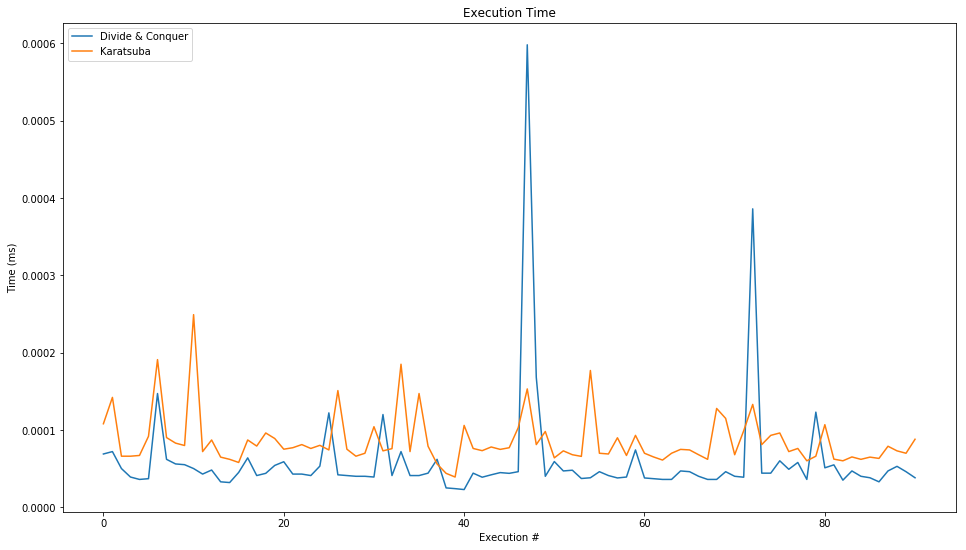

In [255]:
tb = []
td = []
tk = []
    
for i in range(1001, 2000, 11):
    r = map(int, str(i))
    l = len(r)
    
    x = r
    y = r

    rd = Timer(lambda: basic(x, y, l))
    td.append(rd.timeit(number=1))

    rk = Timer(lambda: karatsuba(x, y, l))
    tk.append(rk.timeit(number=1))
    
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(td, label="Divide & Conquer")
plt.plot(tk, label="Karatsuba")
plt.legend(loc="upper left")
plt.title("Execution Time")
plt.xlabel("Execution #")
plt.ylabel("Time (ms)")
plt.show()